## Analysis of a speech

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kennethenevoldsen/asent/blob/main/docs/tutorials/analysis_of_trump_speech.ipynb)

This pipeline is an educational example of how one could analyse a text using Asent. For this analysis we use a single speech from Trump.

In [1]:
import spacy
import asent

def load_speech():
    file_path = "trump_speech.txt"

    with open(file_path, "r") as f:
        speech = f.read()

    return speech

speech = load_speech()

/Users/au561649/Github/asent/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print(speech[:200]) # examine the first 200 characters

Well, thank you very much. And good afternoon.

As President, my highest and most solemn duty is the defense of our nation and its citizens.

Last night, at my direction, the United States military su


To analyse the text we will need a spacy pipeline with the asent component and a sentencizer:

In [3]:
# create spacy pipeline:
nlp = spacy.blank("en")
nlp.add_pipe("sentencizer")
nlp.add_pipe("asent_en_v1")


/Users/au561649/Github/asent/.venv/lib/python3.9/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
doc = nlp(speech)  # process document
sentences = [sent for sent in doc.sents]  # extract sentences

## Examining a sentence

In [5]:
for i in range(5):
    asent.visualize(sentences[i])

If we want to take a closer look as a specific sentence we can use the analysis visualization.

In [ ]:
asent.visualize(sentences[2], "analysis")

Already here we get quite a lot of information? Which opens up for a bunch of questions:

- Should we update the model with new words?
- Should we remove some words?
- Could we do other things to improve the analysis? E.g. what about "United" in the United States? Should that be positive?

## Extracting polarities

To extract the polarity from a sentence we can simply use the `._.polarity` attribute to get teh polarity of the sentence:

In [10]:
sentences[2]._.polarity

SpanPolarityOutput(neg=0.076, neu=0.853, pos=0.071, compound=-0.024, span=As President, my highest and most solemn duty is the defense of our nation and its citizens.

)

Then assuming we want the compound (average) polarity we can simply extract it as so:

In [9]:
# extracting polarity from one sentence:
compound_polarity = sentences[2]._.polarity.compound
compound_polarity

-0.024005576936002263

For all the documents we can thus do:

In [33]:
# Polarity pr. sentence
polarities = [sent._.polarity.compound for sent in sentences]

And we can then plot the polarities using matplotlib:

Text(0, 0.5, 'Polarity')

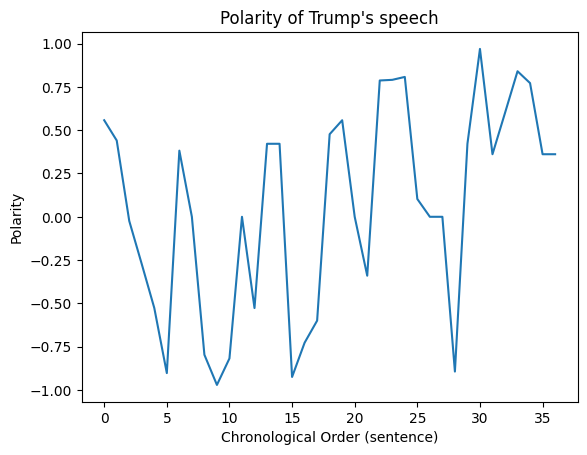

In [34]:
# Plot polarities
import matplotlib.pyplot as plt
plt.plot(polarities)
plt.title("Polarity of Trump's speech")
plt.xlabel("Chronological Order (sentence)")
plt.ylabel("Polarity")

## Analysis

What do we see from this plot? We see that the Trumps speech consistently varies from positive to negative. For example:

> "Under my leadership, America’s policy is unambiguous:
> To terrorists who harm or intend to harm any American, we will find you; we will eliminate you.
> We will always protect our diplomats, service members, all Americans, and our allies."

Does this match with your subjective reading of the speech?

Other analyses we could take a look is:
- extraction of positive/negative words
- comparison of sentiment across documents
- What is spoken positive or negative about? Can we use the Dependency tree?
- Error analysis af lexicon 


## Improving the plot (optional)
In the following I do a bit of work to improve the visualization.

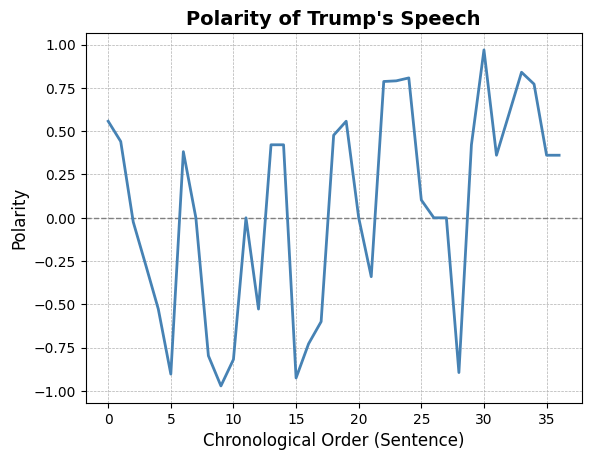

In [18]:
# Add a horizontal line at y=0 to indicate neutrality
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)


# Plot polarities with a line style and color
plt.plot(polarities, color='steelblue', linestyle='-', linewidth=2)

# Improve the title and axis labels with font size adjustments and clarity
plt.title("Polarity of Trump's Speech", fontsize=14, fontweight='bold')
plt.xlabel("Chronological Order (Sentence)", fontsize=12)
plt.ylabel("Polarity", fontsize=12)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve the tick marks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Show the plot with the enhancements
plt.show()